In [1]:
import numpy as np
import pandas as pd
df =pd.read_csv("diabetes (4).csv")
df

# D-margin is sum of d plus and d minus

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.shape

(768, 9)

In [5]:
df.columns 

# x(Independent variable): 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#  'BMI', 'DiabetesPedigreeFunction', 'Age'],
# y (Dependent variable): 'Outcome'

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [49]:
# Hyperplane : It helps to classify the model 
# Soft margin classifier , C : It allows some missclassification in order to occur on a non-linearly separable data 
#  so high value of C sometimes overfitting.
# Low value of C leads to underfitting.


In [129]:
non_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for coloumn in non_zero:
    df[coloumn] = df[coloumn].replace(0,np.NaN)
    mean = int(df[coloumn].mean(skipna = True))
    df[coloumn] = df[coloumn].replace(np.NaN,mean)
    print(df[coloumn])

# NaN :  Not a Number
#skipna : skipping a null number 
# NaN is using to removing the outliers 

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64
0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64
0      35.0
1      29.0
2      29.0
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766    29.0
767    31.0
Name: SkinThickness, Length: 768, dtype: float64
0      155.0
1      155.0
2      155.0
3       94.0
4      168.0
       ...  
763    180.0
764    155.0
765    112.0
766    155.0
767    155.0
Name: Insulin, Length: 768, dtype: float64
0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64


In [123]:
x=df.iloc[:,0:8]
x

# iloc is exclusive of last index
# loc is inclusive of last index 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47


In [107]:
y=df.iloc[:,8]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [127]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

# Spliting the data to traing and testing 

In [131]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test=sc_X.fit_transform(x_test)

# .fit_transform :  Scaling the values by using standardScaler


In [143]:
from sklearn.svm import SVC
from sklearn import svm
svm1=svm.SVC(kernel='linear',C=0.01)
svm1.fit(x_test,y_test)
SVC(C=0.01,kernel='linear')

# svm.SVC  is  importing SVC from svm
# kernel helps to convert low dimensionl to high dimensional 

SVC(C=0.01, kernel='linear')

In [115]:
y_pred=svm1.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [145]:
y_pred1=svm1.predict(x_train)
y_pred1

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [147]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[95,  4],
       [36, 19]], dtype=int64)

In [155]:
cm=confusion_matrix(y_train,y_pred1)
cm

array([[381,  20],
       [153,  60]], dtype=int64)

<Axes: >

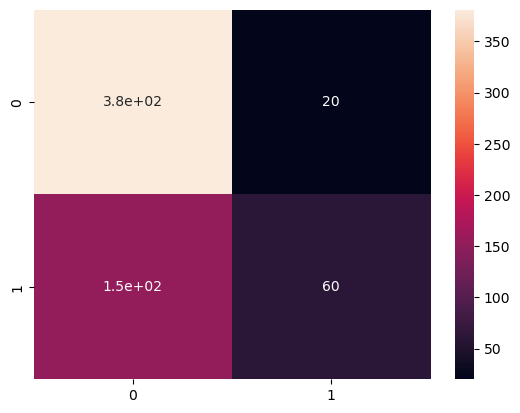

In [157]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [159]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        99
           1       0.83      0.35      0.49        55

    accuracy                           0.74       154
   macro avg       0.78      0.65      0.66       154
weighted avg       0.76      0.74      0.71       154



In [161]:
print(classification_report(y_train,y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       401
           1       0.75      0.28      0.41       213

    accuracy                           0.72       614
   macro avg       0.73      0.62      0.61       614
weighted avg       0.73      0.72      0.67       614



In [163]:
print(accuracy_score(y_test,y_pred))

0.7402597402597403


In [165]:
print(accuracy_score(y_train,y_pred1))

0.7182410423452769


In [168]:
# Infer : Excelent model